<a href="https://colab.research.google.com/github/kunalshenoy1604/CodeClauseInternship_CustomerSegmentation/blob/main/CustomerSegmentation_Kunal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
df=pd.read_csv("/content/drive/MyDrive/customer_segmentation.csv")
df.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [10]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [11]:
df['Age'].value_counts()

35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64

In [13]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [9]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [14]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [15]:
df = df.fillna(method='ffill')   #Filling Missing Values with Forward Filling Method
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [17]:
df=df.drop(['ID'],axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Work_Experience'}>],
       [<Axes: title={'center': 'Family_Size'}>, <Axes: >]], dtype=object)

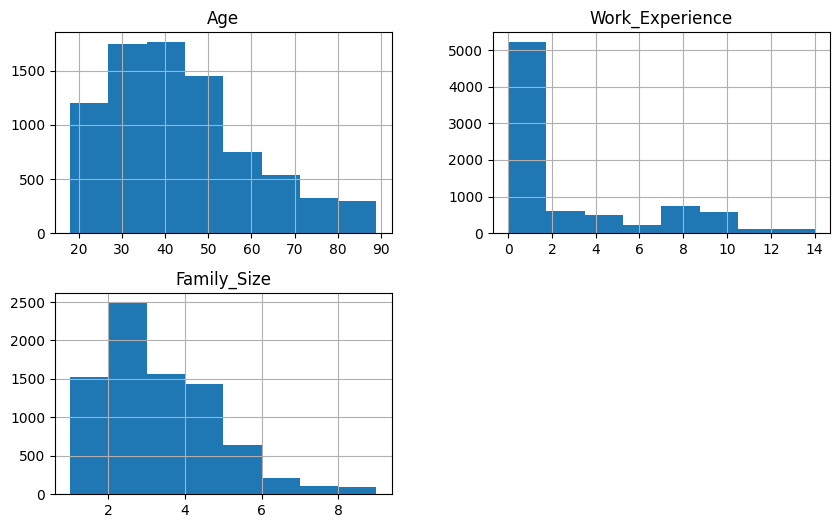

In [18]:
df.hist(bins=8,figsize=(10,6))

<Axes: xlabel='Segmentation', ylabel='count'>

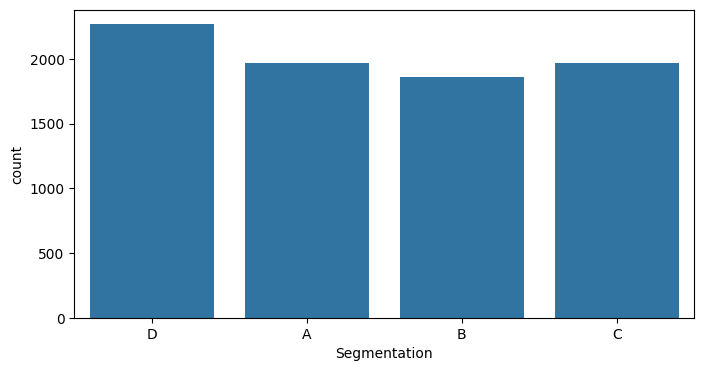

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x='Segmentation',data=df)

<Axes: xlabel='Profession', ylabel='count'>

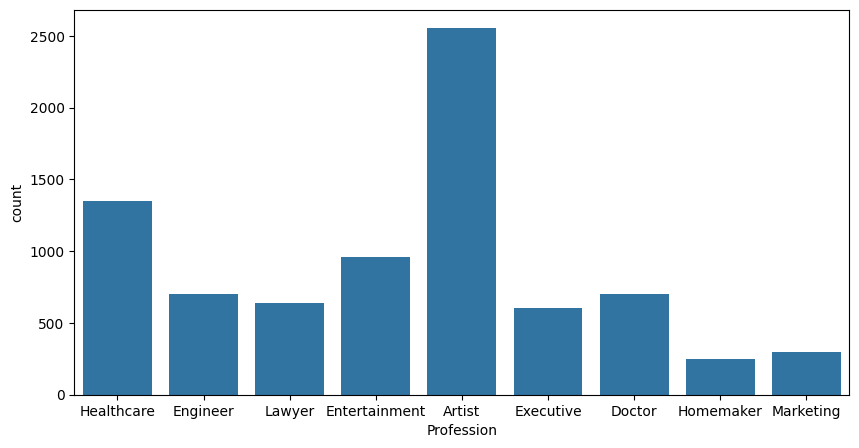

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x ='Profession', data = df)

<Axes: xlabel='Gender', ylabel='count'>

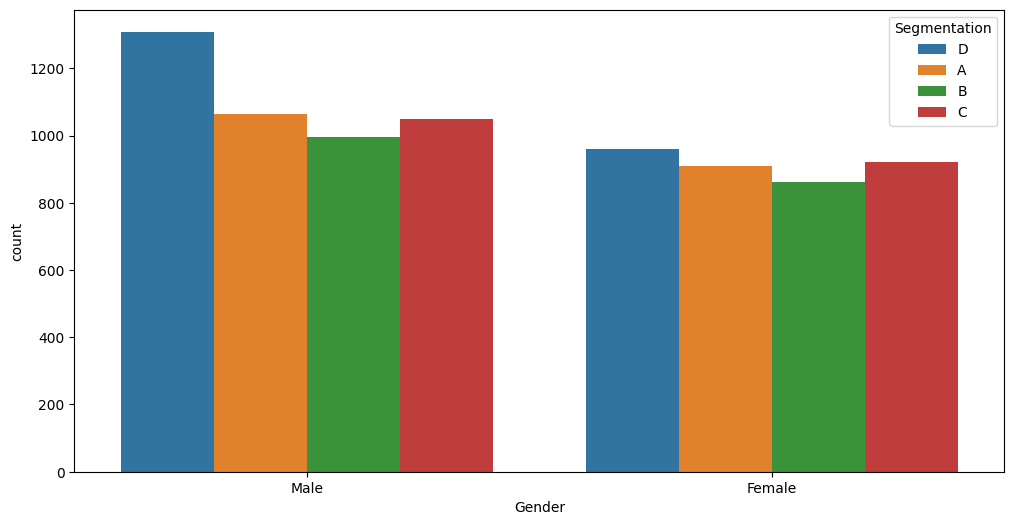

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='Segmentation', data=df)

<Axes: xlabel='Spending_Score', ylabel='count'>

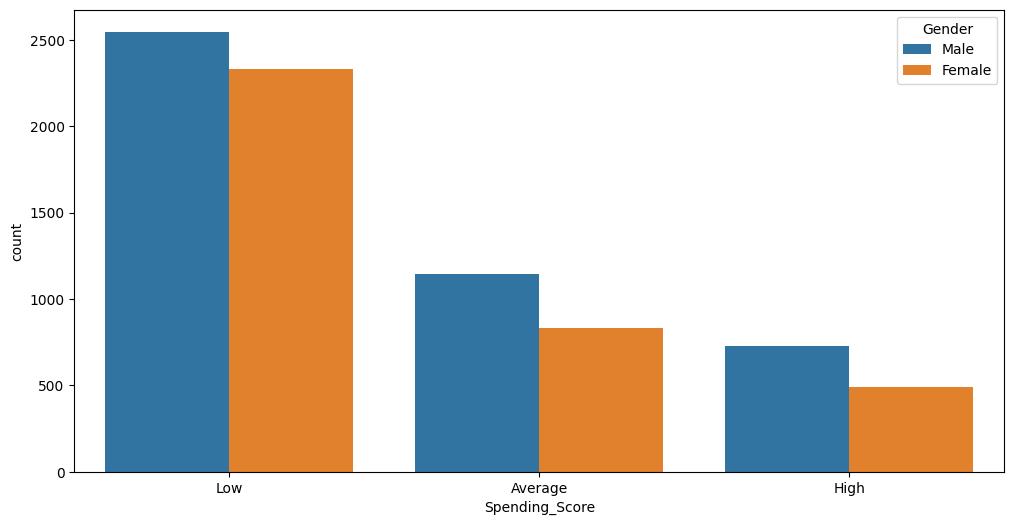

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='Spending_Score', hue='Gender', data=df)

<Axes: xlabel='Ever_Married', ylabel='count'>

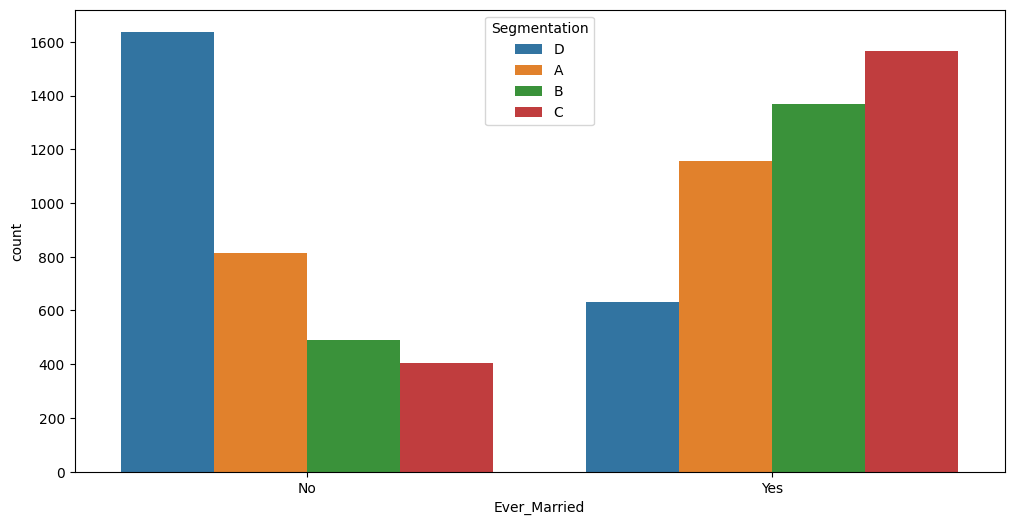

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Ever_Married', hue = 'Segmentation', data = df)


<Axes: xlabel='Spending_Score', ylabel='count'>

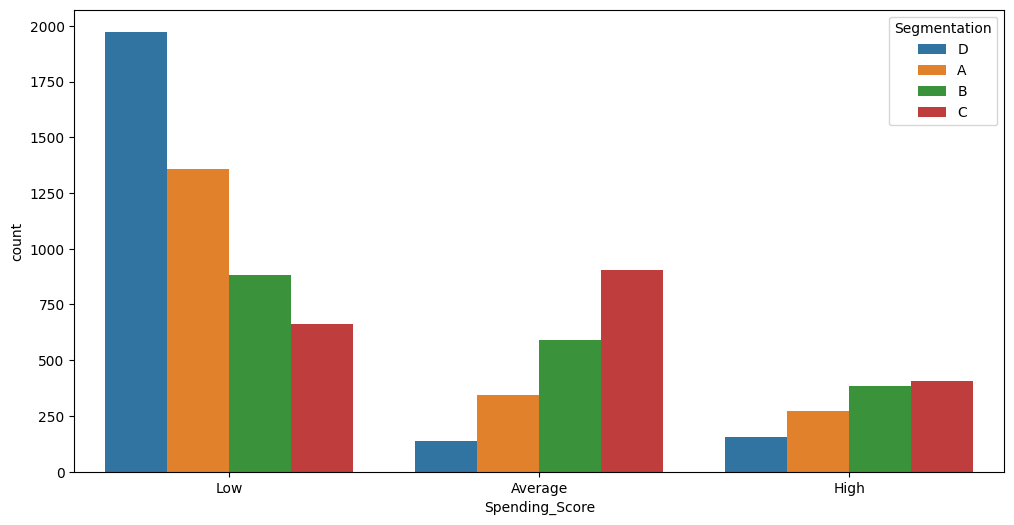

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='Spending_Score', hue='Segmentation', data=df)

In [34]:
df['Gender']=df['Gender'].replace({'Male': 1, 'Female': 0})
df['Ever_Married']=df['Ever_Married'].replace({'Yes': 1, 'No': 0})
df['Profession']=df['Profession'].replace({'Healthcare': 0, 'Engineer': 1, 'Lawyer': 2, 'Artist': 3, 'Entertainment': 4, 'Doctor': 5, 'Executive': 6, 'Marketing': 7, 'Homemaker': 8})
df['Graduated']=df['Graduated'].replace({'Yes': 1, 'No': 0})
df['Spending_Score'] = df['Spending_Score'].replace({'Low': 0, 'Average': 1, 'High': 2})
df['Segmentation'] = df['Segmentation'].replace({'A': 1,'B': 2,'C': 3,'D': 4})
df['Var_1'] = df['Var_1'].replace({'Cat_1': 1, 'Cat_2': 2, 'Cat_3': 3, 'Cat_4': 4, 'Cat_5': 5, 'Cat_6': 6, 'Cat_7': 7})


In [35]:
df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,0,1.0,0,4.0,4,4
1,0,1,38,1,1,1.0,1,3.0,4,1
2,0,1,67,1,1,1.0,0,1.0,6,2
3,1,1,67,1,2,0.0,2,2.0,6,2
4,0,1,40,1,4,0.0,2,6.0,6,1
5,1,1,56,0,3,0.0,1,2.0,6,3
6,1,0,32,1,0,1.0,0,3.0,6,3
7,0,0,33,1,0,1.0,0,3.0,6,4
8,0,1,61,1,1,0.0,0,3.0,7,4
9,0,1,55,1,3,1.0,1,4.0,6,3


In [37]:
X = df.drop(columns='Segmentation')
y = df['Segmentation']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [45]:
scaler=StandardScaler()
X_train_SCALED= scaler.fit_transform(X_train)
X_test_SCALED= scaler.fit_transform(X_test)

In [46]:
Decision_tree_classifier=DecisionTreeClassifier(max_depth = 7)
Decision_tree_classifier.fit(X_train_SCALED,y_train)
y_pred_decision_tree=Decision_tree_classifier.predict(X_test_SCALED)

In [47]:
accuracy=accuracy_score(y_pred_decision_tree,y_test)
print('Accuracy (Decision Tree) :',accuracy)

Accuracy (Decision Tree) : 0.5142503097893433


In [50]:
Logistic_Regression_classifier = LogisticRegression()
Logistic_Regression_classifier.fit(X_train_SCALED, y_train)
y_pred_logistic_regression = Logistic_Regression_classifier.predict(X_test_SCALED)

In [51]:
accuracy=accuracy_score(y_pred_logistic_regression,y_test)
print('Accuracy (Logistic Regression) :',accuracy)

Accuracy (Logistic Regression) : 0.47893432465923175


In [53]:
Random_Forest_Classifier=RandomForestClassifier(n_estimators=100)
Random_Forest_Classifier.fit(X_train_SCALED, y_train)
y_pred_random_forest=Random_Forest_Classifier.predict(X_test_SCALED)

In [54]:
accuracy=accuracy_score(y_pred_random_forest,y_test)
print('Accuracy (Random Forest Classifiers) :',accuracy)

Accuracy (Random Forest Classifiers) : 0.4770755885997522


In [55]:
k_neigbours_classifier = KNeighborsClassifier()
k_neigbours_classifier.fit(X_train_SCALED,y_train)
y_pred_k_neigbours_classifier = k_neigbours_classifier.predict(X_test_SCALED)

In [56]:
accuracy=accuracy_score(y_pred_k_neigbours_classifier,y_test)
print('Accuracy (K-Neigbours) :',accuracy)

Accuracy (K-Neigbours) : 0.44919454770755884


In [61]:
classifier = AdaBoostClassifier(estimator=Random_Forest_Classifier,random_state=42)
classifier.fit(X_train_SCALED, y_train)


AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42)

In [66]:
accuracy_ada = classifier.score(X_train_SCALED, y_train)
print('Accuracy of model on train set:', accuracy)

Accuracy of model on train set: 0.9603346761698172


In [68]:
predictions = classifier.predict(X_test_SCALED)
test_accuracy = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_accuracy)

Accuracy of model on test set: 0.4801734820322181


              precision    recall  f1-score   support

           1       0.40      0.38      0.39       399
           2       0.33      0.29      0.31       368
           3       0.49      0.50      0.49       405
           4       0.64      0.71      0.67       442

    accuracy                           0.48      1614
   macro avg       0.46      0.47      0.47      1614
weighted avg       0.47      0.48      0.47      1614



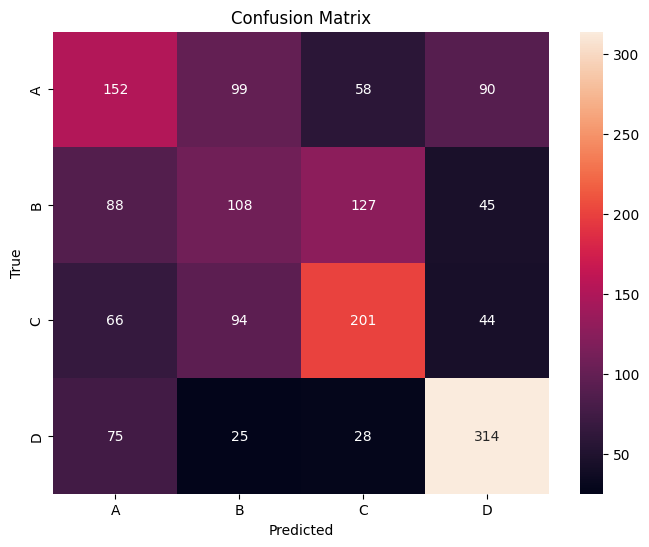

In [73]:
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
class_labels = ['A','B','C','D']
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()